In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pickle

def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

,time_crawled,bundesland,anzahl,differenz_zum_vortag,faelle_letzte_7_tage,_7_tage_inzidenz,todesfaelle
0,2021-07-27,baden-wuerttemberg,504277,98,1359,12.2,10383
1,2021-08-02,baden-wuerttemberg,505902,78,1658,14.9,10395
2,2021-08-03,baden-wuerttemberg,505995,93,1605,14.5,10401
3,2021-08-04,baden-wuerttemberg,506312,317,1559,14.0,10411
4,2021-08-05,baden-wuerttemberg,506733,421,1642,14.8,10422


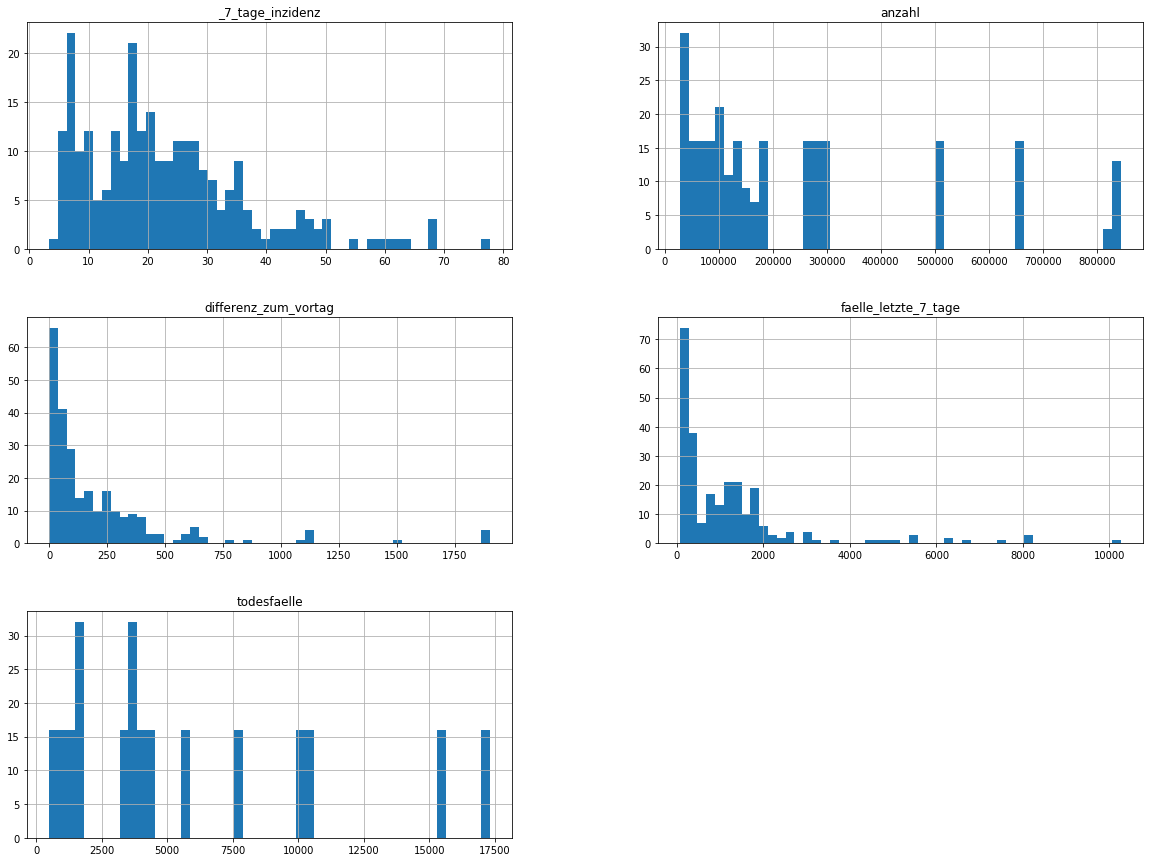

In [6]:

df = pd.read_csv("faelleRKI.csv", index_col=0)
df = df.rename(columns={'zeit_abgerufen':'time_crawled'})
df["time_crawled"] = pd.to_datetime(df["time_crawled"])
df["time_crawled"] = df["time_crawled"].dt.strftime('%Y-%m-%d')
df["time_crawled"] = pd.to_datetime(df["time_crawled"])
df.set_index("time_crawled")
df.head()
df.hist(bins=50, figsize=(20,15))
df.head()

In [114]:
# Frankfurt Oder, Neubrandenburg, Rothaargebierge, Kaiserslautern, Kaltennordheim
weather = pd.read_csv("weather.csv", index_col=0)

weather["time_crawled"] = pd.to_datetime(weather["time_crawled"])
weather["time_crawled"] = weather["time_crawled"].dt.strftime('%Y-%m-%d')
weather.set_index("time_crawled")
# preprocess
weather = weather.replace(["Frankft./Od.", "Neubrandbg.", "Rothaargeb.", "Kaisersl.", "Kaltennordh."], ["Frankfurt Oder", "Neubrandenburg", "Rothaargebierge", "Kaiserslautern", "Kaltennordheim"])

weather.head()

,time_crawled,bundesland,temperature,city
0,2021-07-27,bayern,23.0,Augsburg
1,2021-07-27,bayern,25.0,Bamberg
2,2021-07-27,bayern,21.0,Berchtesgaden
3,2021-07-27,bayern,15.0,Großer Arber
4,2021-07-27,bayern,23.0,Lindau


In [129]:
weatherCases = pd.merge(weather, cityTemp)
weatherCases = pd.merge(weatherCases, df)
weatherCases.set_index("time_crawled")
weatherCases["time_crawled"] = pd.to_datetime(weatherCases["time_crawled"])
save_obj(weatherCases, "weatherCases")

In [61]:
from  geopy.geocoders import Nominatim

def citynameToCoordinates(city):
    print(city, " processing...")
    geolocator = Nominatim(user_agent="Your_Name")
    country ="Germany"
    loc = geolocator.geocode(city+','+ country)
    if loc is not None:
        return loc.latitude,loc.longitude
    else:
        print(city, " not found!!")

## Custom Visualization

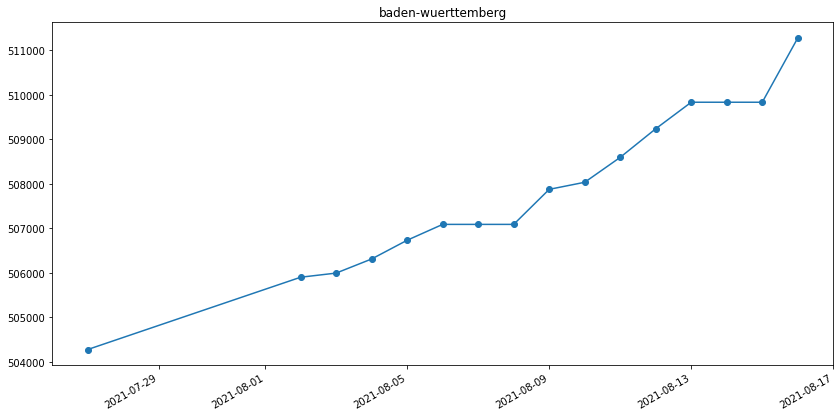

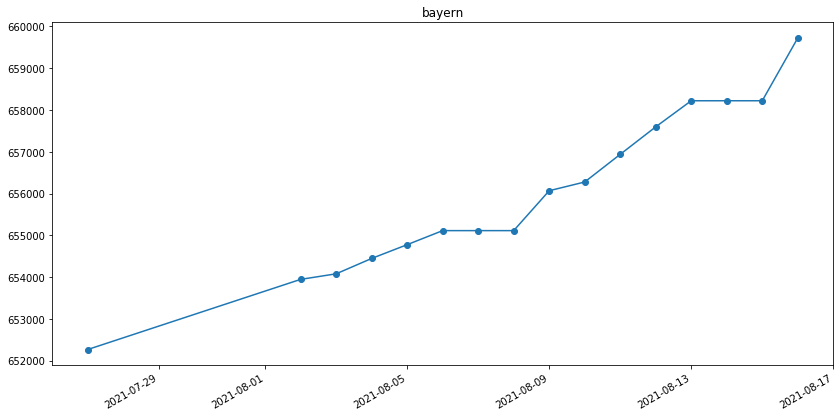

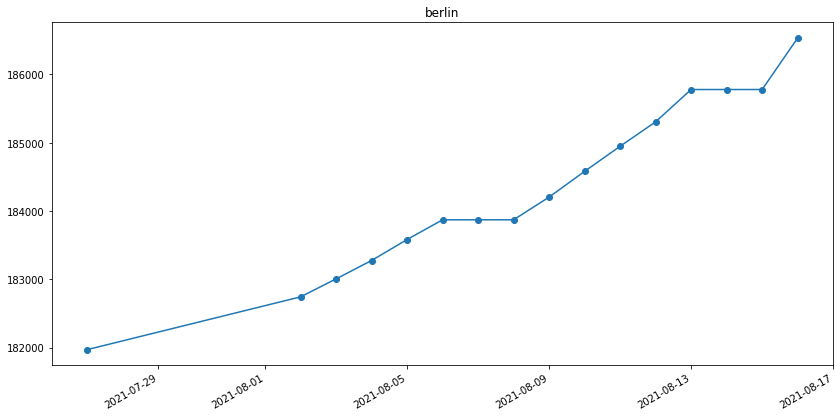

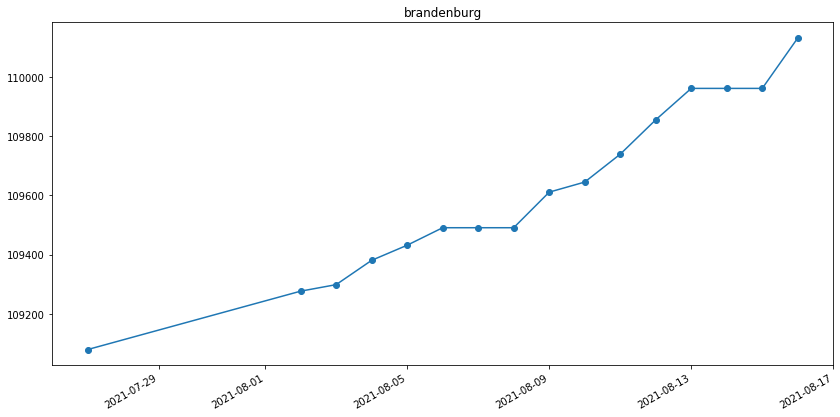

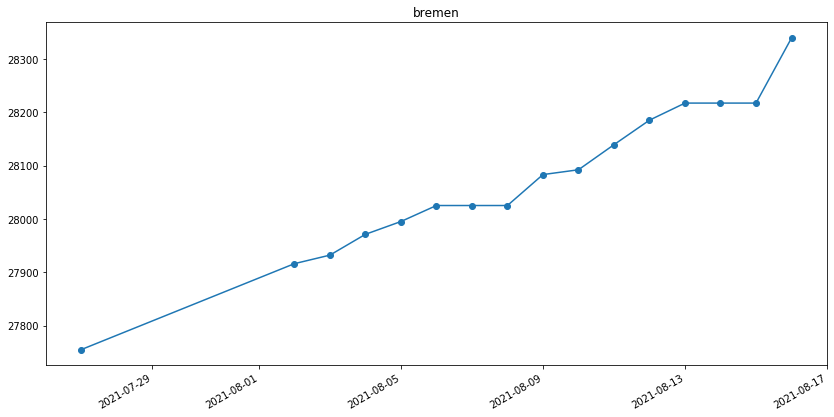

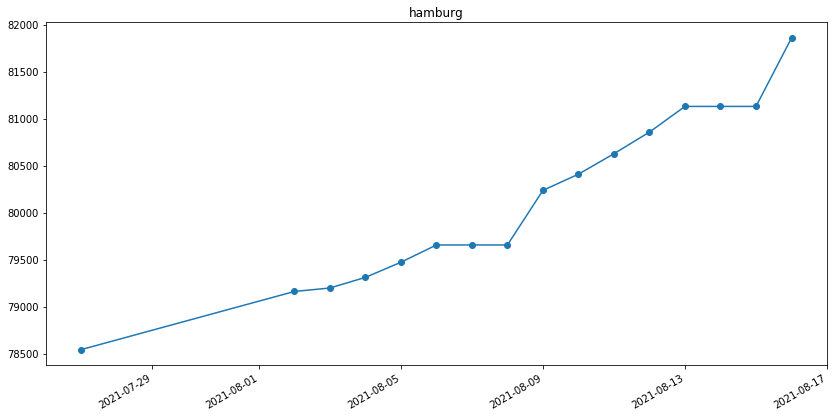

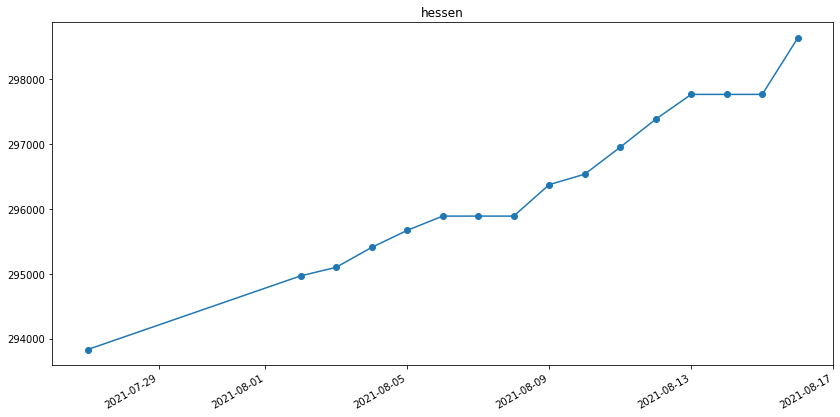

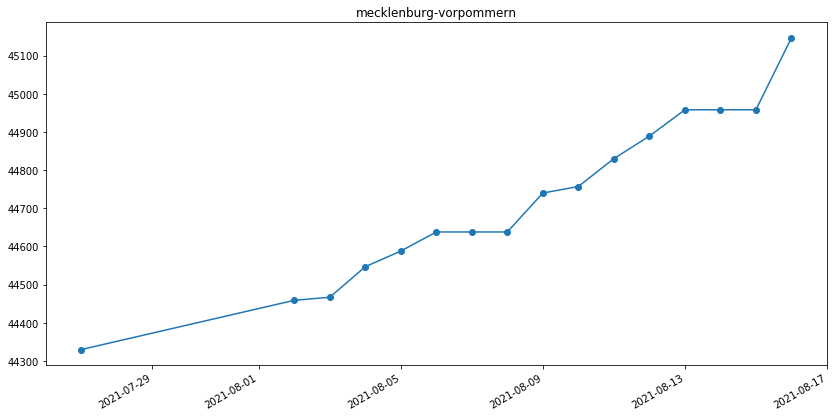

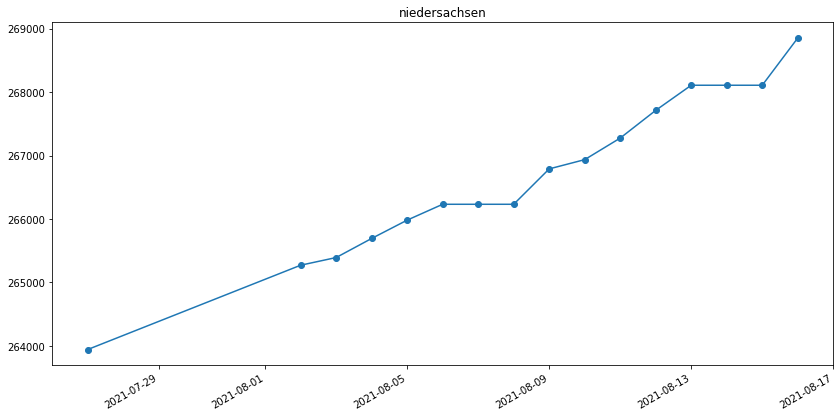

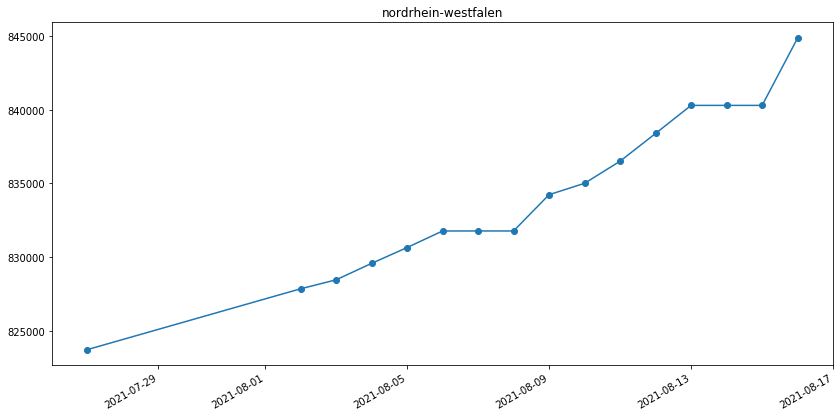

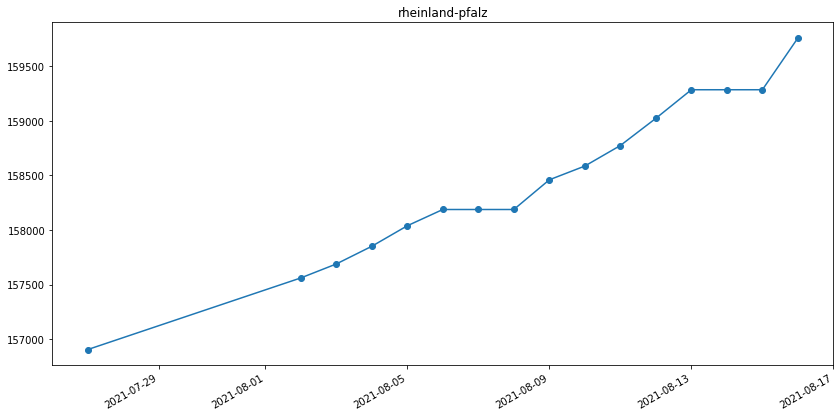

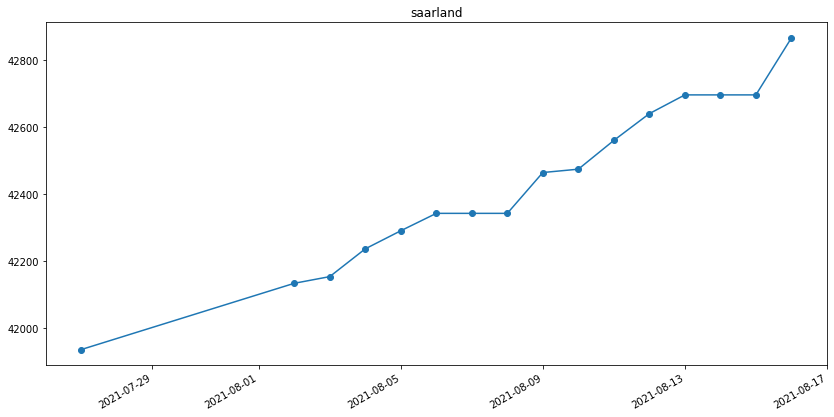

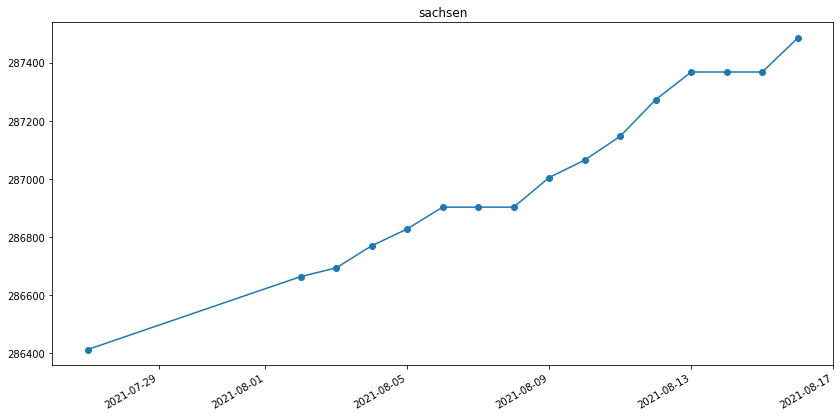

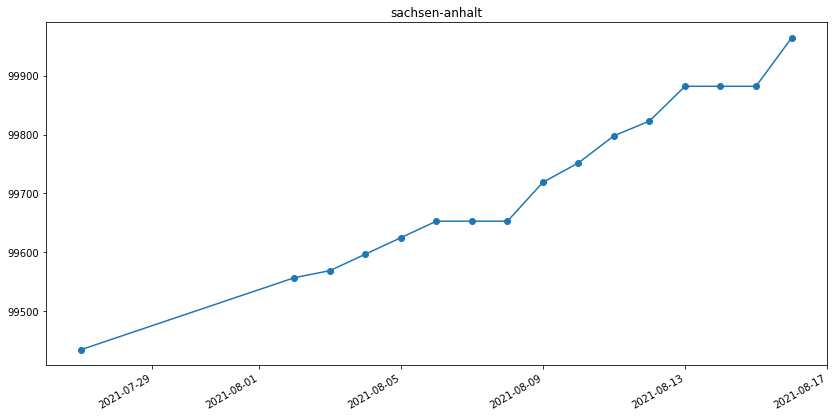

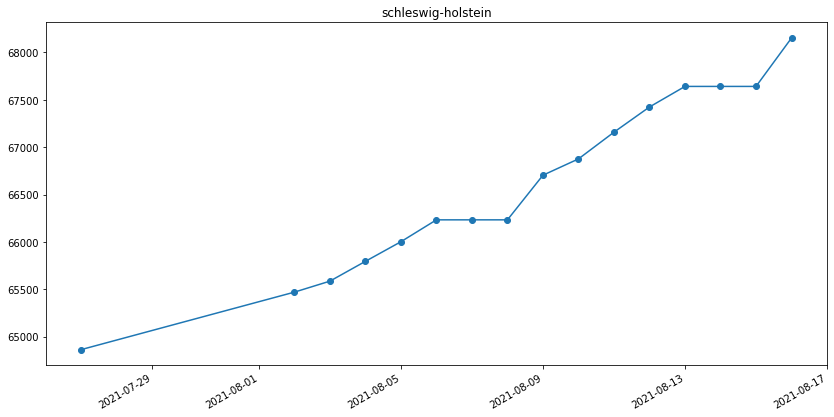

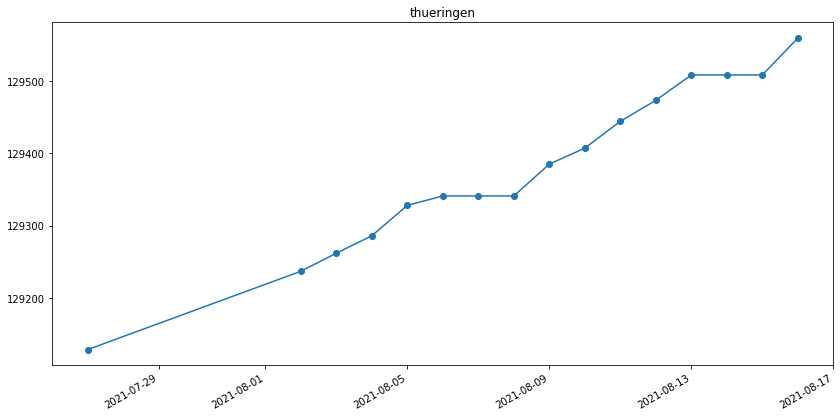

In [10]:
cityCoords = load_obj("cityCoords")
cityTemp = pd.DataFrame.from_dict(cityCoords,  orient='index', columns=['latitude', 'longitude'])
cityTemp.reset_index(inplace=True)
cityTemp = cityTemp.rename(columns={'index':'city'})

for b in df["bundesland"].unique():
    visualize(b, "anzahl")

In [8]:
def visualize(bundesland, column):
    onlyBd = df.loc[df['bundesland'] == bundesland]
    plt.tight_layout()
    plt.title(bundesland)
    plt.plot_date(onlyBd["time_crawled"], onlyBd[column], linestyle='solid')
    plt.gcf().autofmt_xdate()
    plt.rcParams["figure.figsize"] = [14.00, 7]
    plt.show()

In [96]:
# cityCoords = dict()

for city in weather["city"].unique():
    if city not in cityCoords:
        val = citynameToCoordinates(city)
        cityCoords[city] = val
    
save_obj(cityCoords, "cityCoords")

## Vaccination table

In [204]:
# processing vaccination table
vaccinations = pd.read_csv("vaccinations_germany.csv", index_col=0)
vaccinations["time_crawled"] = pd.to_datetime(vaccinations["time_crawled"])
vaccinations["time_crawled"] = vaccinations["time_crawled"].dt.strftime('%Y-%m-%d')
vaccinations["time_crawled"] = pd.to_datetime(vaccinations["time_crawled"])
vaccinations.set_index("time_crawled")
vaccinations = vaccinations.rename(columns={'code':'bundesland'})

# replace bundesland code to bundesland

codes = ['DE-BB', 'DE-BE', 'DE-BW', 'DE-BY', 'DE-HB', 'DE-HE', 'DE-HH',
       'DE-MV', 'DE-NI', 'DE-NW', 'DE-RP', 'DE-SH', 'DE-SL', 'DE-SN',
       'DE-ST', 'DE-TH']

bundeslaender = ["brandenburg", "berlin", "baden-wuerttemberg","bayern","bremen", "hessen","hamburg","mecklenburg-vorpommern","niedersachsen","nordrhein-westfalen","rheinland-pfalz", "schleswig-holstein","saarland","sachsen","sachsen-anhalt","thueringen"]

vaccinations = vaccinations.replace(codes, bundeslaender)


vaccinations.head()

vacCases = pd.merge(vaccinations, df)
vacCases.set_index("time_crawled")
vacCases["time_crawled"] = pd.to_datetime(vacCases["time_crawled"])
vacCases

,time_crawled,bundesland,vaccinationsTotal,peopleFirstTotal,peopleFullTotal,anzahl,differenz_zum_vortag,faelle_letzte_7_tage,_7_tage_inzidenz,todesfaelle
0,2021-07-27,brandenburg,2508303,1395334,1186113,109080,18,126,5.0,3817
1,2021-07-27,berlin,3928365,2208722,1802440,181973,259,909,24.8,3581
2,2021-07-27,baden-wuerttemberg,11853409,6571774,5572699,504277,98,1359,12.2,10383
3,2021-07-27,bayern,13614235,7716354,6206867,652265,168,1739,13.2,15320
4,2021-07-27,bremen,840030,476192,391615,27755,10,120,17.6,493
...,...,...,...,...,...,...,...,...,...,...
251,2021-08-16,schleswig-holstein,3637658,1973063,1770482,68152,97,1421,48.9,1641
252,2021-08-16,saarland,1260125,685229,608761,42866,33,396,40.1,1030
253,2021-08-16,sachsen,4124898,2178690,2027690,287485,2,429,10.5,10148
254,2021-08-16,sachsen-anhalt,2399917,1286530,1193487,99964,29,234,10.7,3470


## All together

In [208]:
temperature = pd.read_csv("avgTemperature.csv", index_col=0)
temperature["time_crawled"] = pd.to_datetime(temperature["time_crawled"])
temperature["time_crawled"] = temperature["time_crawled"].dt.strftime('%Y-%m-%d')
temperature["time_crawled"] = pd.to_datetime(temperature["time_crawled"])
temperature.set_index("time_crawled")

allData = pd.merge(vacCases, temperature)
allData.set_index("time_crawled")
allData["time_crawled"] = pd.to_datetime(allData["time_crawled"])
save_obj(allData, "allData")

In [195]:
weather["bundesland"].unique()

array(['bayern', 'baden-wuerttemberg', 'berlin', 'brandenburg', 'bremen',
       'hamburg', 'mecklenburg-vorpommern', 'niedersachsen',
       'nordrhein-westfalen', 'rheinland-pfalz', 'saarland', 'sachsen',
       'sachsen-anhalt', 'schleswig-holstein', 'thueringen'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232238B6A08>,
      dtype=object)

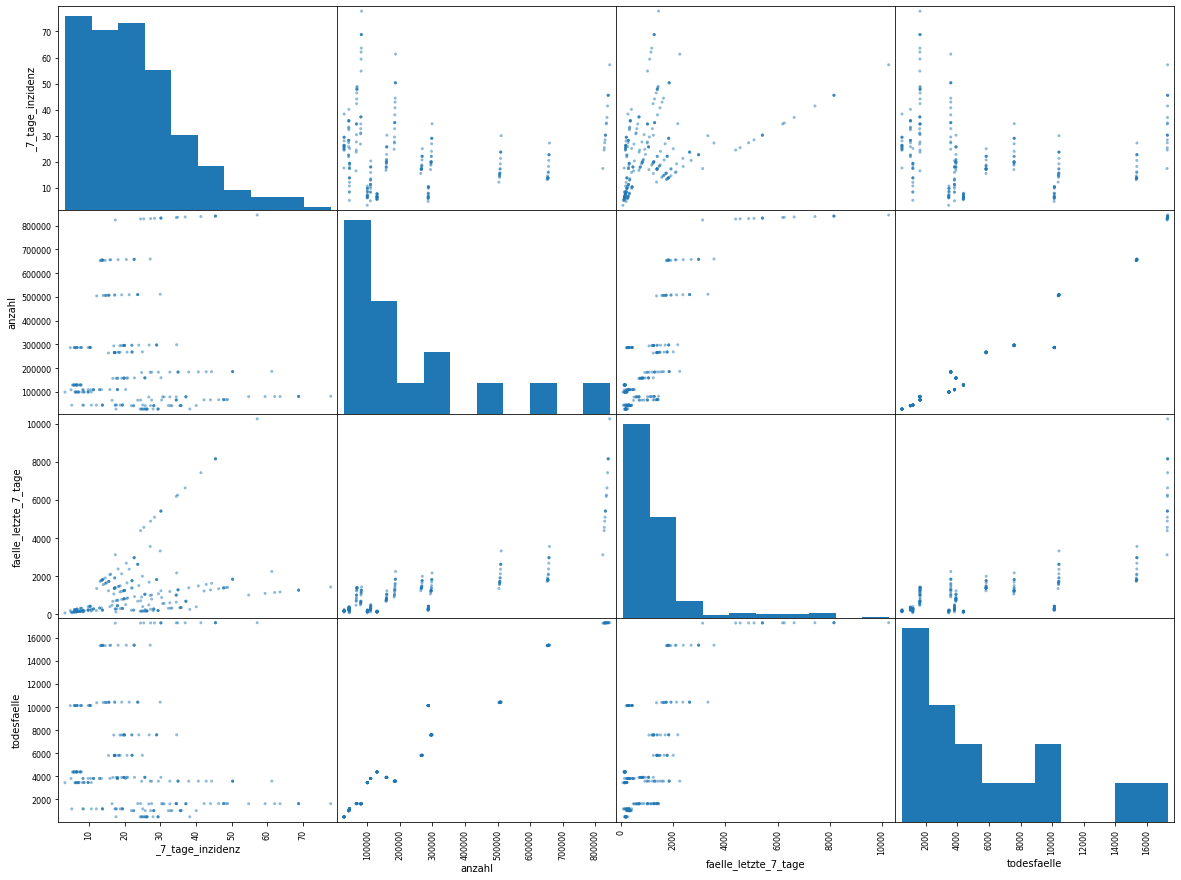

In [35]:
from pandas.plotting import scatter_matrix
attributes = ["_7_tage_inzidenz", "anzahl", "faelle_letzte_7_tage", "todesfaelle"]
scatter_matrix(df[attributes], figsize=(20,15))